<a href="https://colab.research.google.com/github/nikhilbansal23/Fraudsters-Detection/blob/main/Fraudsters_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#imposting libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
import datetime as dt
from datetime import datetime as dt1

In [50]:
countries = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/countries.csv")
currency_details = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/currency_details.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/transactions.csv")
users = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/users.csv")


In [51]:
#this stops data truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [52]:
print("Total records in users data frame " + str(len(users)))
print("Total records in transaction data frame " + str(len(transactions)))
print("Total records in countries data frame " + str(len(countries)))
print("Total records in currency_details data frame " + str(len(currency_details)))


Total records in users data frame 9944
Total records in transaction data frame 688651
Total records in countries data frame 226
Total records in currency_details data frame 184


Stiching Data Together

In [53]:
cust = users.merge(transactions,left_on = 'ID',right_on='USER_ID',how='inner')

In [54]:
cust = cust.merge(countries,left_on = 'COUNTRY',right_on='CODE',how='inner')

In [55]:
customer_data =  cust.merge(currency_details,left_on = 'CURRENCY',right_on='CCY',how='inner')

In [56]:
#user status - STATE_x user_state
#transaction status - STATE_y transaction_state
# user id - ID_x	user_id
# transaction id - ID_y transaction_id
# user creation date - CREATED_DATE_x user_creation_date
# transaction create date - CREATED_DATE_y transaction_creation_date

cols_rename = {'STATE_x' : 'user_state', "STATE_y":"transaction_state", "ID_x":'user_id',"ID_y":"transaction_id","CREATED_DATE_x":"user_creation_date","CREATED_DATE_y":"transaction_creation_date"}
customer_data.rename(columns= cols_rename,inplace=True)

In [57]:
customer_data.drop(['USER_ID'], axis=1, inplace = True)


In [58]:
customer_data = customer_data.loc[:, ~customer_data.columns.duplicated()]

In [59]:
#lowercasing dataframe headers
customer_data.columns = [x.lower() for x in customer_data.columns]

In [60]:
# reducing columns - code,ccy
customer_data.drop(['code','ccy'], axis=1, inplace = True)


In [61]:
customer_data.groupby(['is_fraudster'])['user_id'].count()

is_fraudster
False    624433
True      13914
Name: user_id, dtype: int64

In [62]:
customer_data.describe()

,has_email,birth_year,failed_sign_in_attempts,amount,amount_usd,numcode,phonecode,exponent
count,638347.000000,638347.000000,638347.000000,6.383470e+05,5.857320e+05,638347.000000,638347.000000,638347.000000
mean,0.989249,1984.943445,0.009341,3.249031e+04,6.861673e+03,641.720469,109.226206,2.002951
std,0.103129,9.885179,0.139696,2.381297e+06,7.504013e+04,232.344865,131.069434,0.188669
min,0.000000,1927.000000,0.000000,0.000000e+00,0.000000e+00,32.000000,30.000000,0.000000
25%,1.000000,1980.000000,0.000000,4.670000e+02,3.460000e+02,440.000000,44.000000,2.000000
50%,1.000000,1987.000000,0.000000,1.393000e+03,1.008000e+03,826.000000,44.000000,2.000000
75%,1.000000,1992.000000,0.000000,5.000000e+03,3.689000e+03,826.000000,48.000000,2.000000
max,1.000000,2000.000000,6.000000,9.000000e+08,1.641211e+07,826.000000,594.000000,8.000000


In [63]:
date_columns = ['user_creation_date','transaction_creation_date','terms_version']
customer_data[date_columns] = customer_data[date_columns].apply(pd.to_datetime)

In [64]:
# customer_data.info()

In [65]:
print("Combined dataframes column count is " +str(len(customer_data.columns)))

Combined dataframes column count is 28


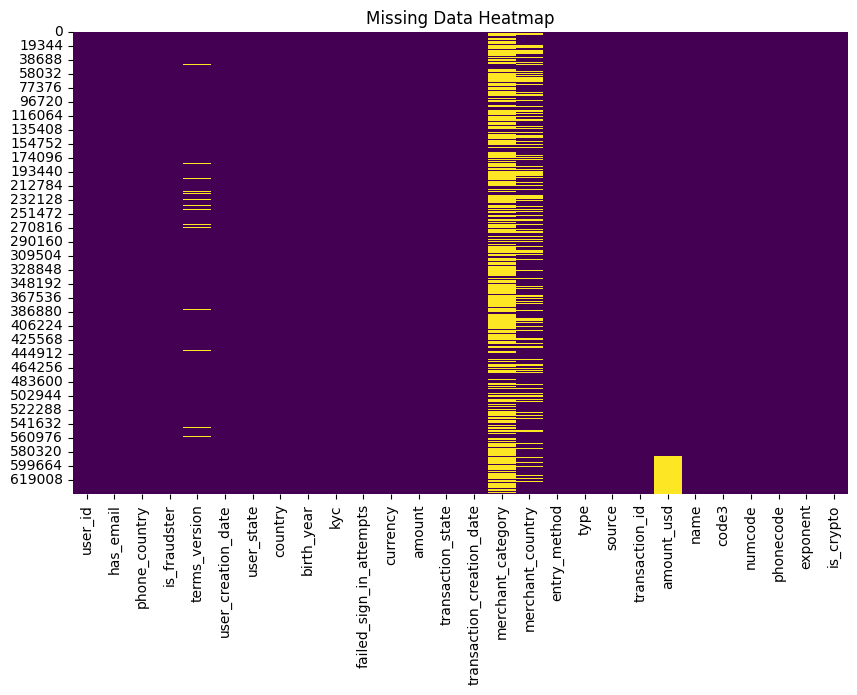

In [66]:
missing_data = customer_data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(customer_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [67]:
print("More than 50% of values are null in Merchant country  " + str("{:.2%}".format((customer_data['merchant_category'].isnull().sum()/len(customer_data)))))


More than 50% of values are null in Merchant country  67.33%


In [68]:
# # (customer_data['amount_usd'].isnull().sum()/len(customer_data))*100
# customer_data.groupby('merchant_category')['user_id'].count().sort_values(byascending=False)
# customer_data.groupby(by=['merchant_category'], sort=False)['user_id'].count()
(customer_data['terms_version'].isnull().sum()/len(customer_data))*100

4.019443970129099

In [69]:
customer_data.groupby(by=['terms_version'], sort=False)['user_id'].count()

terms_version
2018-05-25    212956
2018-01-01      7345
2018-09-20    298402
2018-03-20     78452
2017-01-16      6844
2017-02-02      3105
2018-01-13      5585
Name: user_id, dtype: int64

In [70]:
df = customer_data

In [71]:
df['user_creation_quarter'] = df['user_creation_date'].dt.quarter

In [72]:
df['user_creation_year'] = df['user_creation_date'].dt.year
df['user_creation_month'] = df['user_creation_date'].dt.month

In [73]:
df['transaction_creation_quarter'] = df['transaction_creation_date'].dt.quarter
df['transaction_creation_year'] = df['transaction_creation_date'].dt.year
df['transaction_creation_month'] = df['transaction_creation_date'].dt.month

In [74]:
df['terms_version_quarter'] = df['terms_version'].dt.quarter
df['terms_version_year'] = df['terms_version'].dt.year
df['terms_version_month'] = df['terms_version'].dt.month

In [75]:
df.drop(['user_creation_date','transaction_creation_date','terms_version'], axis=1, inplace = True)


In [76]:
df.drop(['phone_country','phonecode','numcode','exponent'], axis=1, inplace = True)


In [77]:
df.drop(['country'], axis=1, inplace = True)


In [78]:
df.drop(['code3'], axis=1, inplace = True)


In [79]:
# df.groupby('code3',sort=False)['user_id'].count()

In [80]:
cols_rename = {'name' : 'country'}
df.rename(columns= cols_rename,inplace=True)

In [81]:
current_year = dt1.now().year
df['user_age'] = current_year - df['birth_year']

In [82]:
df.drop(['birth_year'], axis=1, inplace = True)


In [83]:
df.head()

,user_id,has_email,is_fraudster,user_state,kyc,failed_sign_in_attempts,currency,amount,transaction_state,merchant_category,merchant_country,entry_method,type,source,transaction_id,amount_usd,country,is_crypto,user_creation_quarter,user_creation_year,user_creation_month,transaction_creation_quarter,transaction_creation_year,transaction_creation_month,terms_version_quarter,terms_version_year,terms_version_month,user_age
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,False,ACTIVE,PASSED,0,GBP,50000,COMPLETED,NaN,NaN,misc,TOPUP,HERA,29df55ae-accd-47c2-85f6-ed499703b75d,37130.0,United Kingdom,False,3,2017,8,2,2018,5,2.0,2018.0,5.0,52
1,1872820f-e3ac-4c02-bdc7-727897b60043,1,False,ACTIVE,PASSED,0,GBP,1000,COMPLETED,NaN,NaN,misc,TOPUP,HERA,1a050680-bb84-436f-a93b-79b7e75775db,749.0,United Kingdom,False,3,2017,8,3,2017,8,2.0,2018.0,5.0,52
2,1872820f-e3ac-4c02-bdc7-727897b60043,1,False,ACTIVE,PASSED,0,GBP,100,REVERTED,NaN,NaN,misc,TOPUP,HERA,826381fe-8248-4616-993d-ceb52fb04807,74.0,United Kingdom,False,3,2017,8,3,2017,8,2.0,2018.0,5.0,52
3,545ff94d-66f8-4bea-b398-84425fb2301e,1,False,ACTIVE,PASSED,0,GBP,500,COMPLETED,NaN,NaN,misc,P2P,INTERNAL,40ad821f-db81-4f8f-b7c6-6d7acc50e836,376.0,United Kingdom,False,1,2017,3,3,2018,7,1.0,2018.0,1.0,41
4,545ff94d-66f8-4bea-b398-84425fb2301e,1,False,ACTIVE,PASSED,0,GBP,499,COMPLETED,NaN,NaN,misc,P2P,INTERNAL,b0c2b678-fe57-4ced-b03c-43178c5834bd,375.0,United Kingdom,False,1,2017,3,3,2018,7,1.0,2018.0,1.0,41


In [84]:
# check  = df[df['user_id'] == '545ff94d-66f8-4bea-b398-84425fb2301e']
# check.groupby('transaction_id',sort=False)['user_id'].count()
len(df.columns)

28

<Axes: ylabel='is_fraudster'>

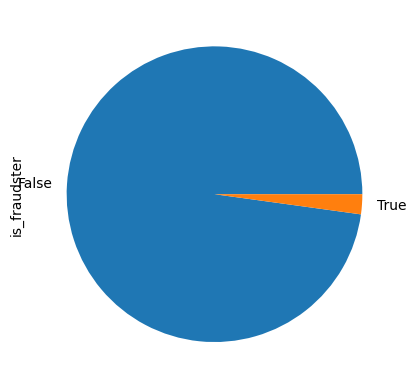

In [85]:
df["is_fraudster"].value_counts().plot.pie()

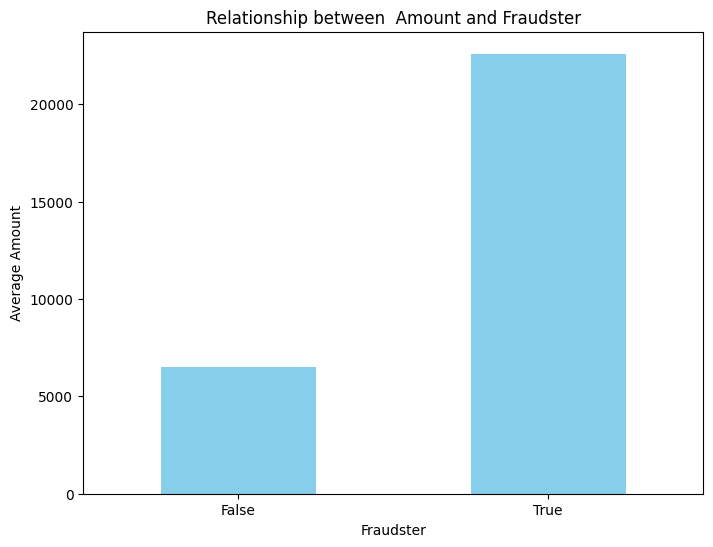

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
grouped = df.groupby('is_fraudster')['amount_usd'].mean()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Fraudster')
plt.ylabel('Average Amount')
plt.title('Relationship between  Amount and Fraudster')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

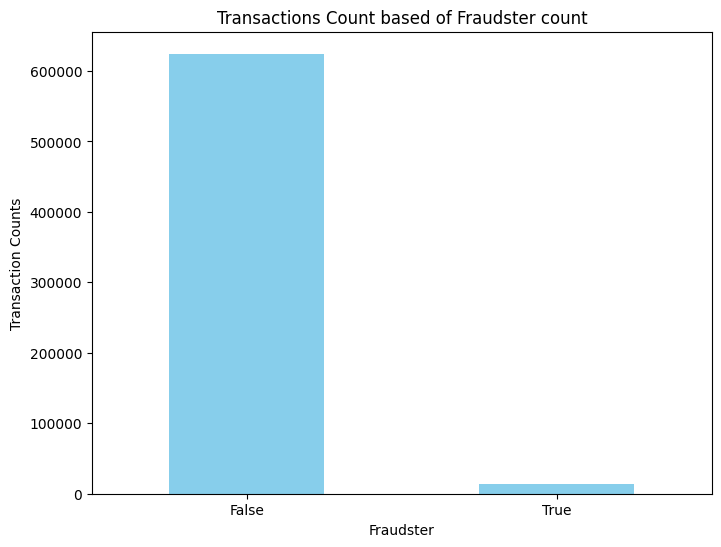

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df.groupby('is_fraudster')['transaction_id'].count()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Fraudster')
plt.ylabel('Transaction Counts')
plt.title('Transactions Count based of Fraudster count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

In [92]:
df_fraudster = df[df['is_fraudster'] == True]

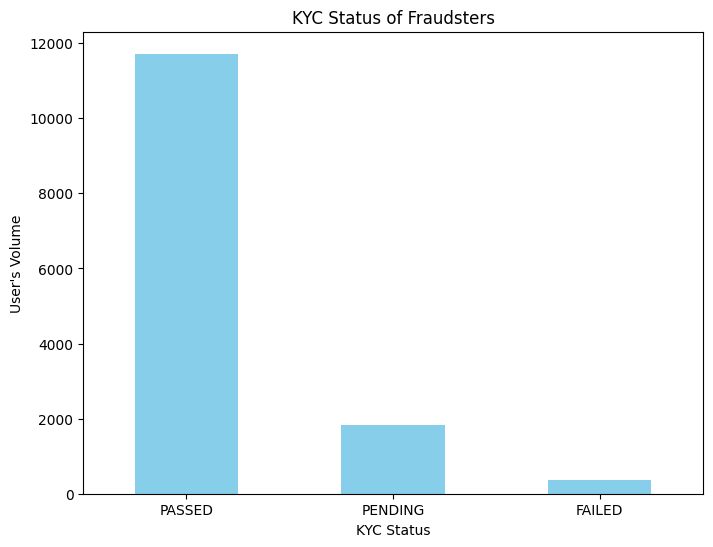

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df_fraudster.groupby('kyc')['user_id'].count().nlargest(5)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('KYC Status')
plt.ylabel("User's Volume")
plt.title('KYC Status of Fraudsters')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

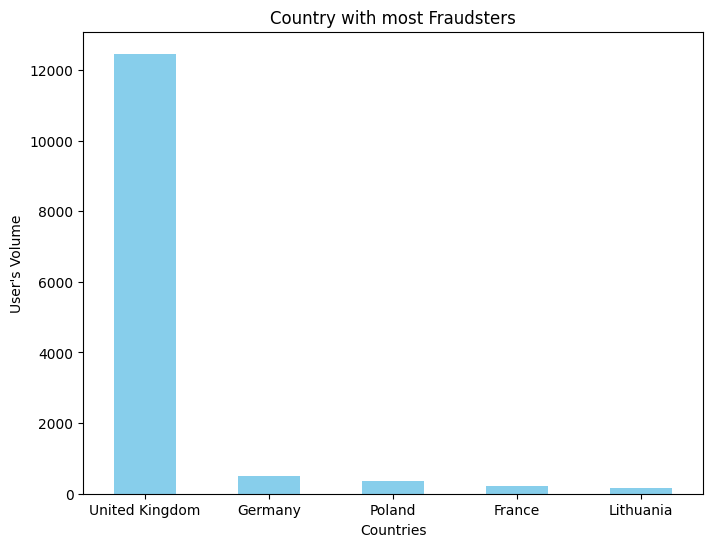

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df_fraudster.groupby('country')['user_id'].count().nlargest(5)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Countries')
plt.ylabel("User's Volume")
plt.title('Country with most Fraudsters')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

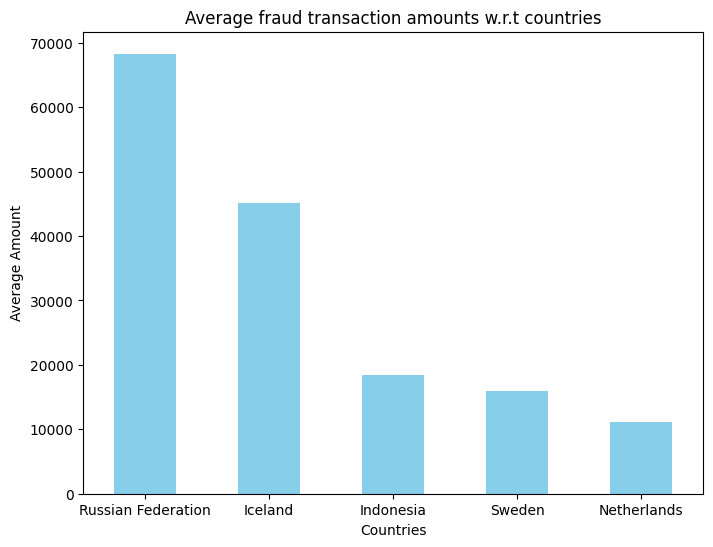

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
grouped = df.groupby('country')['amount_usd'].mean().nlargest(5)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Average Amount')
plt.title('Average fraud transaction amounts w.r.t countries')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

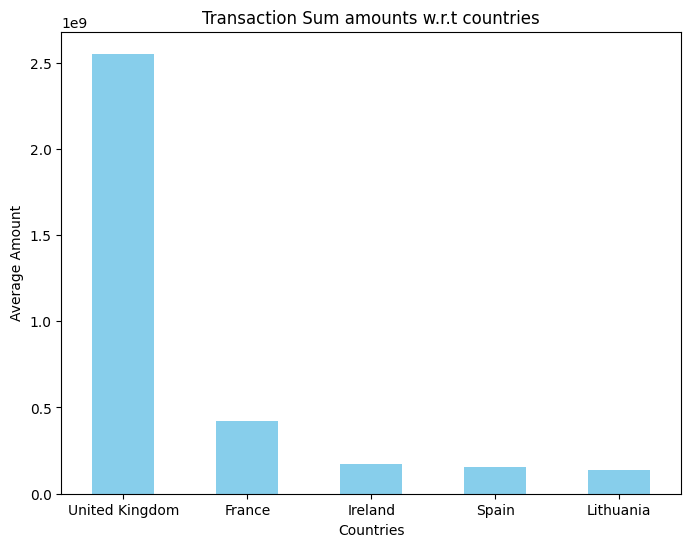

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
grouped = df.groupby('country')['amount_usd'].sum().nlargest(5)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Average Amount')
plt.title('Transaction Sum amounts w.r.t countries')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

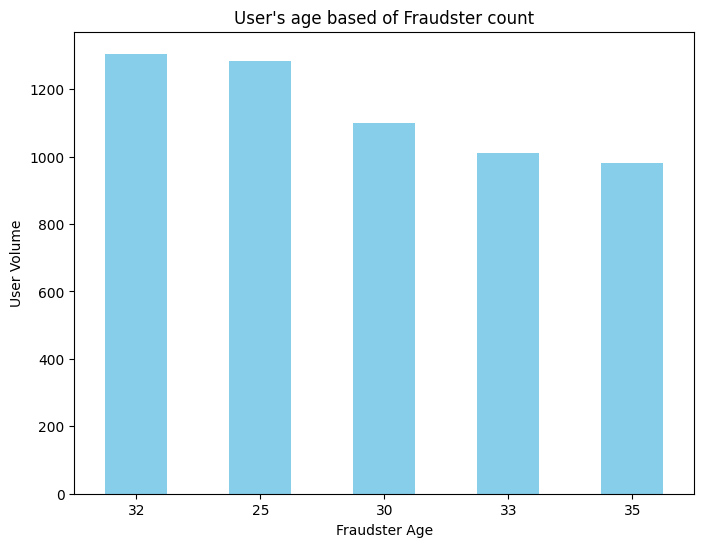

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df_fraudster.groupby('user_age')['user_id'].count().nlargest(5)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Fraudster Age')
plt.ylabel('User Volume')
plt.title("User's age based of Fraudster count")
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

<Axes: ylabel='user_id'>

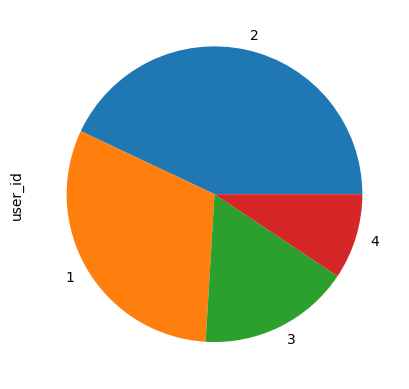

In [119]:
grouped = df_fraudster.groupby('transaction_creation_quarter')['user_id'].count().nlargest(5)

grouped.plot.pie()

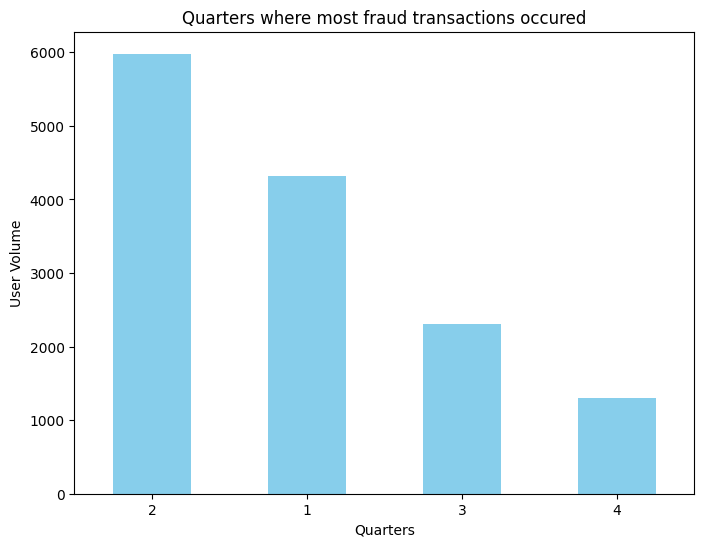

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df_fraudster.groupby('transaction_creation_quarter')['user_id'].count().nlargest(5)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Quarters')
plt.ylabel('User Volume')
plt.title("Quarters where most fraud transactions occured")
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

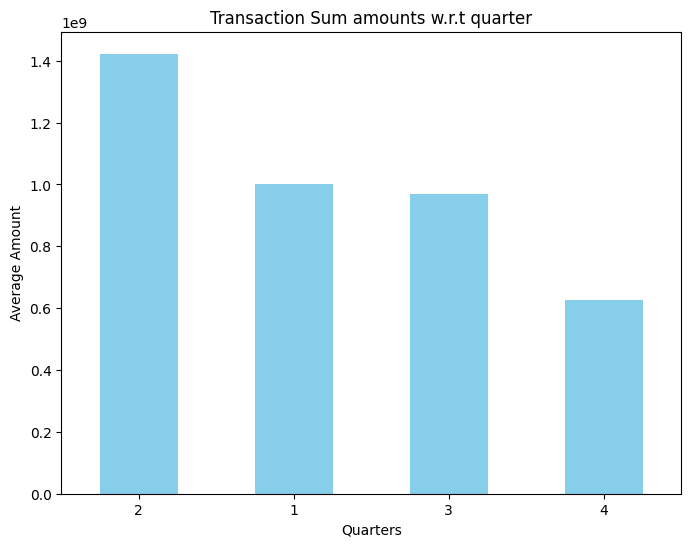

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
grouped = df.groupby('transaction_creation_quarter')['amount_usd'].sum().nlargest(5)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Quarters')
plt.ylabel('Average Amount')
plt.title('Transaction Sum amounts w.r.t quarter')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

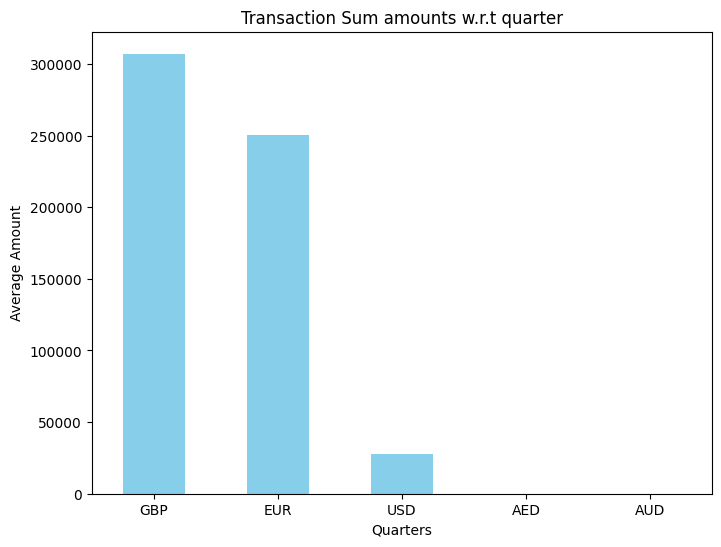

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
grouped = df.groupby('currency')['amount_usd'].count().nlargest(5)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Quarters')
plt.ylabel('Average Amount')
plt.title('Transaction Sum amounts w.r.t quarter')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

In [94]:
df_fraudster.head()

,user_id,has_email,is_fraudster,user_state,kyc,failed_sign_in_attempts,currency,amount,transaction_state,merchant_category,merchant_country,entry_method,type,source,transaction_id,amount_usd,country,is_crypto,user_creation_quarter,user_creation_year,user_creation_month,transaction_creation_quarter,transaction_creation_year,transaction_creation_month,terms_version_quarter,terms_version_year,terms_version_month,user_age
220770,848fc1b1-096c-40f7-b04a-1399c469e421,1,True,LOCKED,PASSED,0,GBP,59700,COMPLETED,NaN,NaN,misc,TOPUP,MINOS,062feaed-978a-4e04-b167-accf58d4f51e,45481.0,United Kingdom,False,2,2018,6,2,2018,6,2.0,2018.0,5.0,29
220771,848fc1b1-096c-40f7-b04a-1399c469e421,1,True,LOCKED,PASSED,0,GBP,10000,COMPLETED,NaN,NaN,misc,BANK_TRANSFER,MINOS,0baebd76-a069-46a0-b566-2b3c98779415,7618.0,United Kingdom,False,2,2018,6,2,2018,6,2.0,2018.0,5.0,29
220772,848fc1b1-096c-40f7-b04a-1399c469e421,1,True,LOCKED,PASSED,0,GBP,10000,COMPLETED,NaN,NaN,misc,BANK_TRANSFER,CRONUS,a40d8b2a-8f54-4422-b8e3-9d6fc485b6a6,7525.0,United Kingdom,False,2,2018,6,3,2018,7,2.0,2018.0,5.0,29
220773,848fc1b1-096c-40f7-b04a-1399c469e421,1,True,LOCKED,PASSED,0,GBP,10000,COMPLETED,NaN,NaN,misc,BANK_TRANSFER,MINOS,cb6d9f7c-f53b-40c7-9cde-e9925bb2f704,7387.0,United Kingdom,False,2,2018,6,3,2018,7,2.0,2018.0,5.0,29
220774,848fc1b1-096c-40f7-b04a-1399c469e421,1,True,LOCKED,PASSED,0,GBP,1000,DECLINED,NaN,GBR,chip,ATM,GAIA,0d5adf49-9013-47c2-a39e-aef16567eea7,761.0,United Kingdom,False,2,2018,6,3,2018,7,2.0,2018.0,5.0,29


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df.groupby('is_fraudster')['transaction_id'].count()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Fraudster')
plt.ylabel('Average Amount')
plt.title('Transactions Count based of Fraudster count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

In [90]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop
# Drop features
# df.drop(to_drop, axis=1, inplace=True)

<ipython-input-90-9d546a1fbc10>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


['amount_usd',
 'user_creation_month',
 'transaction_creation_month',
 'terms_version_month']

In [89]:
len(df.columns)

28